<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Для исследовательского анализа предоставлены данные сервиса Яндекс.Недвижимость. Это архив объявлений, который хранит информацию о продаже квартир в Санкт-Петербурге и населенных пунктах, находящихся рядом. В предоставленном файле есть информация о самой квартире (площадь, высота потолков, количество балконов и т.д.), а также картографические данные, такие ка красстояние до центра, аэропорта, ближайшего парка и водоёма. Основная задача исследования определять рыночную стоимость объектов недвижимости и установить параметры, которые влияют на неё. Необходимо изучить следующие параметры: площадь, цена, число комнат, высота потолков. Изучить время продажи квартиры. Определить, какие факторы больше всего влияют на стоимость квартиры. Ответить на вопросы - зависит ли цена от площади, числа комнат, удалённости от центра. В будущем данное исследование поможет построить автоматизированную систему для отслеживания аномалий.

## Изучение данных из файла

In [1]:
import pandas as pd # вызвала библиотеку pandas
import matplotlib.pyplot as plt

In [2]:
table = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # прочитала файл real_estate_data.csv из папки /datasets и сохранила его в переменной table
display(table.head()) # вывела на экран первые пятнадцать строк таблицы
table.info() # получила общую информацию о таблице

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выводы

В таблице двенадцать столбцов. Встречаются несколько типов данных в столбцах — object, float, int, bool.

Согласно документации к данным:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м) (18157 строк заполнено)
balcony — число балконов (12180 строк заполнено)
ceiling_height — высота потолков (м) (14504 строк заполнено) 
cityCenters_nearest — расстояние до центра города (м) (18180 строк заполнено)
days_exposition — сколько дней было размещено объявление (от публикации до снятия) (20518 строк заполнено)
first_day_exposition — дата публикации (23699 строк заполнено)
floor — этаж (23699 строк заполнено)
floors_total — всего этажей в доме (23613 строк заполнено)
is_apartment — апартаменты (булев тип) (2775 строк заполнено)
kitchen_area — площадь кухни в квадратных метрах (м²) (21421 строк заполнено)
last_price — цена на момент снятия с публикации (23699 строк заполнено)
living_area — жилая площадь в квадратных метрах (м²) (21796 строк заполнено)
locality_name — название населённого пункта (23650 строк заполнено)
open_plan — свободная планировка (булев тип) (23699 строк заполнено)
parks_around3000 — число парков в радиусе 3 км (18181 строк заполнено)
parks_nearest — расстояние до ближайшего парка (м) (8079 строк заполнено)
ponds_around3000 — число водоёмов в радиусе 3 км (18181 строк заполнено)
ponds_nearest — расстояние до ближайшего водоёма (м) (9110 строк заполнено)
rooms — число комнат (23699 строк заполнено)
studio — квартира-студия (булев тип) (23699 строк заполнено)
total_area — площадь квартиры в квадратных метрах (м²) (23699 строк заполнено)
total_images — число фотографий квартиры в объявлении (23699 строк заполено)

В таблице 23699 из выведеннных данных видно, что в таблице встречаются пропуски. Пропуски есть в следующих столбцах:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов 
ceiling_height — высота потолков (м) - заменяем на среднее
cityCenters_nearest — расстояние до центра города (м) 
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
floors_total — всего этажей в доме 
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²) (21421 строк заполнено)
living_area — жилая площадь в квадратных метрах (м²) (21796 строк заполнено)
locality_name — название населённого пункта
parks_around3000 — число парков в радиусе 3 км (18181 строк заполнено)
parks_nearest — расстояние до ближайшего парка (м) (8079 строк заполнено)
ponds_around3000 — число водоёмов в радиусе 3 км (18181 строк заполнено) 

Требуется предобработка и замена формата представленных данных для дальнейшей работы.


## Предобработка данных

In [3]:
table['ceiling_height'].describe() #получена информация о столбце ceiling_height

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [4]:
ceiling_height_median = table['ceiling_height'].median() # рассчитала медиану в столбце ceiling_height_median
table['ceiling_height'] = table['ceiling_height'].fillna(value = ceiling_height_median)  # обработка столбца ceiling_height, заменила пропущенные значения на медианое значение

In [5]:
table['kitchen_area'].describe() #получена информация о столбце kitchen_area

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [6]:
 kitchen_area_median = table['kitchen_area'].median() # рассчитала медиану в столбце kitchen_area_median
table['kitchen_area'] = table['kitchen_area'].fillna(value = kitchen_area_median).astype(int)  # обработка столбца kitchen_area, заменила пропущенные значения на медианое значение

In [7]:
table['living_area'].describe() #получена информация о столбце living_area

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [8]:
numbers = 23699 - 21796 # расчитано колличество пропусков в столбце living_area
print('Количество пропусков:', numbers)
percent = numbers/23699 # расчитан процент, который составляет количество пропусков от общего значения
print('Процент пропусков:', percent)

Количество пропусков: 1903
Процент пропусков: 0.08029874678256467


In [9]:
#код ревьюера

for column in table.columns:
    print(column,table[column].isna().mean())

total_images 0.0
last_price 0.0
total_area 0.0
first_day_exposition 0.0
rooms 0.0
ceiling_height 0.0
floors_total 0.0036288450989493226
living_area 0.08029874678256467
floor 0.0
is_apartment 0.8829064517490189
studio 0.0
open_plan 0.0
kitchen_area 0.0
balcony 0.4860542638929913
locality_name 0.002067597788936242
airports_nearest 0.23384952951601334
cityCenters_nearest 0.23287902443141062
parks_around3000 0.232836828558167
parks_nearest 0.6590995400649816
ponds_around3000 0.232836828558167
ponds_nearest 0.6155955947508334
days_exposition 0.13422507278788134


In [10]:
living_area_median = table['living_area'].median() # рассчитала медиану в столбце living_area
table['living_area'] = table['living_area'].fillna(value = living_area_median).astype(int)  # обработка столбца living_area, заменила пропущенные значения на медианое значение

In [11]:
table['parks_around3000'] = table['parks_around3000'].fillna(0).astype(int)# обработка столбца parks_around3000, заменила пропущенные значения на 0 и изменила формат данных
table['balcony'] = table['balcony'].fillna(0) # обработка столбца balcony, заменила пропущенные значения на 0 и изменила формат данных
table['ponds_around3000'] = table['ponds_around3000'].fillna(0).astype(int)# обработка столбца ponds_around3000, заменила пропущенные значения на 0 и изменила формат данных

In [12]:
table['days_exposition'].describe() #получена информация о столбце days_exposition

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [13]:
table['first_day_exposition'] = pd.to_datetime(table['first_day_exposition'], format='%Y-%m-%d %H:%M') #формат даты приведен к единоой форме –

In [14]:
table = table.rename(columns={'cityCenters_nearest': 'citycenters_nearest'}) #переименован столбец citycenters_nearest, наименование приведено к нижнему регистру

In [15]:
print(table['locality_name'].value_counts()) #выведеены уникальные значения в столбце locality_name для анализа

columns_to_replace = ['locality_name'] # пропуски заменены на значения unknown
for columns in columns_to_replace:
    table[columns] = table[columns].fillna('unknown')

def replace_wrong_genres(wrong_genres, correct_genre): #заменены значения посёлок на поселок
    for wrong_genre in wrong_genres:
        table['locality_name'] = table['locality_name'].replace(wrong_genres, correct_genre)
        
duplicates = ['посёлок']
name = 'поселок'
replace_wrong_genres(duplicates, name)


Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Новолисино             1
деревня Большое Рейзино        1
поселок Сумино                 1
посёлок Коробицыно             1
посёлок Высокоключевой         1
Name: locality_name, Length: 364, dtype: int64


In [16]:
table['is_apartment'].fillna(False, inplace=True)
table.dropna(subset=['floors_total'], inplace=True)
table['floors_total'] = table['floors_total'].astype(int)

In [17]:
display(table.isna().sum()) # еще раз проверяем наличие пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
citycenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [18]:
table.info() # итогово проверяем информацию по таблице с предобработанными данными

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  int64         
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  int64         
 13  balcony         



1) Получена информация о столбце ceiling_height - - стандартное отклонение в нём состалет 1.03, то есть при строительстве - высота потолка - это стандартное значение, поэтому можем заменить пропуски медианным значением. В столбце kitchen_area стандартное отклонение выше и составляем 5.9, но также предположим, что это стандартное значение и заменим пропуски медианным значением. В столбце living_area стандартное отклонение составляем 22, то есть говорить о том, что это стандартное значение нельзя, но количество пропусков составляет 8%, и для того чтобы не удалять и не терять данные, заменим пропуски медианным значением.
2) В столбце balcony информация по количеству балконов в квартире. Логично предположить, если этот столбец не заполнен, в квартире нет балконов, поэтому заменяем пропуски на 0. Также заменяем формат строк с float на int - количество балконов - это целочисленные значения. Заменила на 0 пропущенные значения в столбцах parks_around3000, ponds_around3000,ponds_nearest, parks_nearest - предположив, что если эти значения не заполнены, парков и прудов поблизости нет.
3) В столбце table days_exposition невозможно заменить все пропущенные значения на среднее, предположительно, если данные не заполнены, значит квартира еще не продана. Осталяем данные так, как есть, изменив только формат даты.
4) Информация в столбце floors_total  не понадобиться для дальнейшей работы, поэтому удаляем эти знчения (так как их не так много, потеряем не много информации). Пропущенные знаения в столбце is_apartment заменим на False.
5) Так как значения в столбце locality_name нам неизвестны, заменили на значение unknown.
6) В столбцах parks_nearest, airports_nearest, ponds_nearest и cityCenters_nearest данные невозможно заменить, удалить также нет возможности, так как тогда мы потеярем большой объем даннных, поэтому оставляем пропуски так, как есть.

## Расчёты и добавление результатов в таблицу

In [19]:
# создаем новые столбцы в тааблице - день недели, месяц и год публикации
table['weekday'] = table['first_day_exposition'].dt.weekday
table['month'] = table['first_day_exposition'].dt.month
table['year'] = table['first_day_exposition'].dt.year

#рассчитываем цену за квадратный метр

table['price_for_metr'] = (table['last_price']/table['total_area']).astype(int)

# посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

table['correlation_area'] = table['living_area']/table['total_area'] #соотношение жилой и общей площади
table['correlation_area_kitchen'] = table['kitchen_area']/table['total_area'] # отношение площади кухни к общей

#посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой

def floor_def(row): # создана функция для категоризации данных в столбце 'floor'
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total'] != 1:
        return "последний"
    return "другой"
 
table['floor_def'] = table.apply(floor_def, axis = 1)

display(table.head()) #выведена информация с новыми полученными данными

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_for_metr,correlation_area,correlation_area_kitchen,floor_def
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,...,2,755.0,NaN,3,3,2019,120370,0.472222,0.231481,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18,1,False,...,0,NaN,81.0,1,12,2018,82920,0.445545,0.272277,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34,4,False,...,2,574.0,558.0,3,8,2015,92785,0.607143,0.142857,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30,9,False,...,3,234.0,424.0,4,7,2015,408176,0.188679,0.056604,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32,13,False,...,1,48.0,121.0,1,6,2018,100000,0.320000,0.410000,другой



- посчитано и добавлено в таблицу: цена квадратного метра
- посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

## Исследовательский анализ данных

Минимальное значение: 12.0
Максимальное значение: 900.0


<AxesSubplot:>

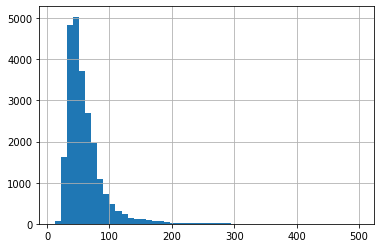

In [20]:
# изучен параметр: площадь квартир

import matplotlib.pyplot as plt
print('Минимальное значение:', table['total_area'].min())
print('Максимальное значение:', table['total_area'].max())
table['total_area'].hist(bins=50, range = (12, 500)) #построена гистограмма столбца 'total_area'

(-50.0, 200.0)

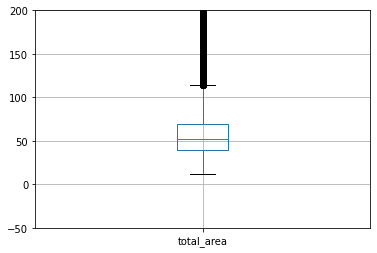

In [21]:
table.boxplot('total_area') # построена диаграмма размаха столбца 'total_area'
plt.ylim(-50, 200)

In [22]:
table = table.query('total_area>=12 and total_area<=110') # местодом query исключены "выбросы"

<AxesSubplot:>

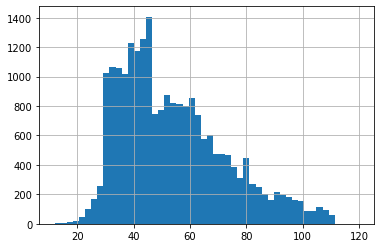

In [23]:
table['total_area'].hist(bins=50, range = (12, 120)) # снова построена гистограмма столбца 'total_area' с обработанными значениями



Гистограмма распределения площади квартир носит ожидаемый характер, большая часть квартир имеет площадь от 30-60 кв.м. Наибольший пик наблюдается у квартир с площадью 45 кв.м. Диаграма размаха показывает, что нормальные значения распредеоены в диапозое от 12 до 110 кв.м., за этим значением наблюдаются выбросы. Методом query отброшены все лишние значения, взят диапозон значений от 12 до 110.

Минимальное значение: 12190.0
Максимальное значение: 53000000.0


<AxesSubplot:>

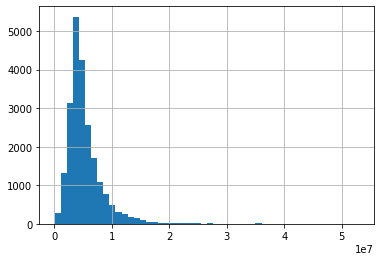

In [24]:
# изучен параметр: цена квартир

print('Минимальное значение:', table['last_price'].min())
print('Максимальное значение:', table['last_price'].max())
table['last_price'].hist(bins=50, range = (12000, 53000000)) # постороена гистограмма столбца last_price

(-500000.0, 15000000.0)

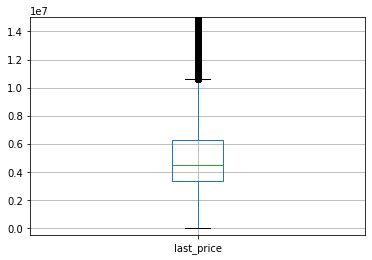

In [25]:
table.boxplot('last_price') # постороена диаграмма размаха столбца last_price
plt.ylim(-500000, 15000000)

In [26]:
table = table.query('last_price <= 11000000')

<AxesSubplot:>

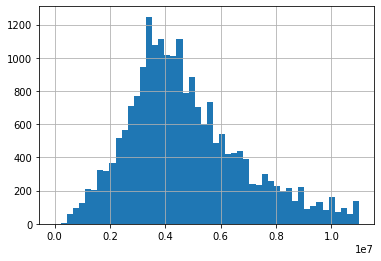

In [27]:
table['last_price'].hist(bins=50, range = (0, 11000000)) # постороена гистограмма столбца last_price


Гистограмма распределения цены квартир носит ожидаемый характер - пик наблюдается при значении цены на квартиру 3,8 млн. Спад значений наюлбдется при цене на квартиру 6 млн.Методом query отброшены все лишние значения, взят диапозон значений до 11 млн построена новая гистограмма для более наглядного представления.

Минимальное значение: 0
Максимальное значение: 6


<AxesSubplot:>

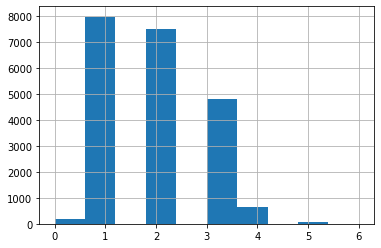

In [28]:
# изучен параметр: количество комнат

print('Минимальное значение:', table['rooms'].min())
print('Максимальное значение:', table['rooms'].max())
table['rooms'].hist(bins=10, range = (0, 6)) # постороена гистограмма столбца rooms

(-1.0, 7.0)

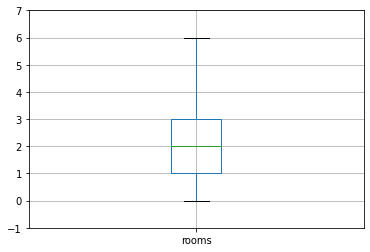

In [29]:
table.boxplot('rooms') # постороена диаграмма размаха столбца rooms
plt.ylim(-1, 7)



Из гистрограммы видно, что в квартирах чаще всего от одной до трех комнат - это наиболее часто встречающиеся значения. По диаграмме размаха видно, что значения лежат в пределах от 0 до 6, распределение нормальное, выбросов нет. При количеств комнат 0 - это студии, 6 комнат в квартире также возможны.

Минимальное значение: 1.0
Максимальное значение: 32.0


<AxesSubplot:>

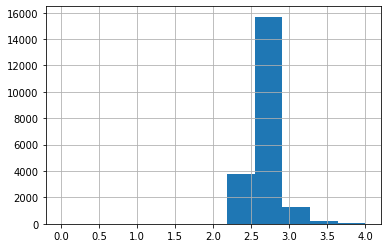

In [30]:
# изучен параметр: высота потолков

print('Минимальное значение:', table['ceiling_height'].min())
print('Максимальное значение:', table['ceiling_height'].max())
table['ceiling_height'].hist(bins=11, range = (0, 4)) # постороена гистограмма столбца ceiling_height

(0.0, 4.0)

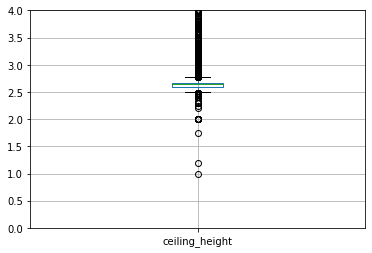

In [31]:
table.boxplot('ceiling_height') # постороена диаграмма размаха столбца ceiling_height
plt.ylim(0, 4)

In [32]:
table = table.query('ceiling_height <= 4.5')

<AxesSubplot:>

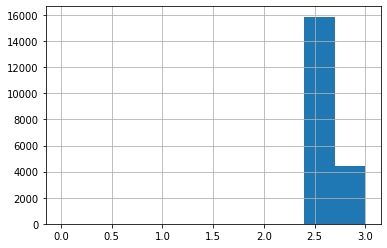

In [33]:
table['ceiling_height'].hist(bins=10, range = (0, 3)) # постороена гистограмма столбца ceiling_height



Из гистрограммы видно, что в квартирах чаще всего  высота потолков от 2.5 местров до 3-х метров. Диаграмма размаха показывает, что нормальные значения лежат в пределах от 1 до 3-х метров, методом query удалены выбросы.

Минимальное значение: 1.0
Максимальное значение: 1580.0
Среднее значение: 171.0076541612764
Медианное значение: 91.0


<AxesSubplot:>

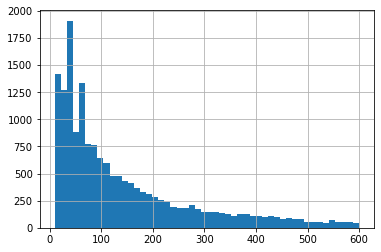

In [34]:
# изучен параметр: время продажи квартир

print('Минимальное значение:', table['days_exposition'].min())
print('Максимальное значение:', table['days_exposition'].max())
print('Среднее значение:', table['days_exposition'].mean())
print('Медианное значение:', table['days_exposition'].median())
table['days_exposition'].hist(bins=50, range = (10, 600)) #построена гистограмма столбца 'days_exposition'

(-50.0, 600.0)

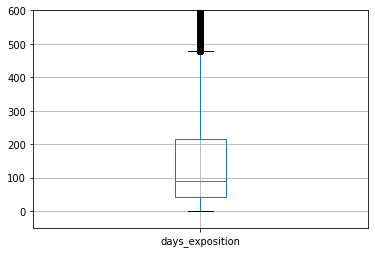

In [35]:
table.boxplot('days_exposition') # постороена диаграмма размаха столбца days_exposition
plt.ylim(-50, 600)

In [36]:
table['days_exposition'].describe()

count    18552.000000
mean       171.007654
std        208.367404
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

Гистоограмма носит ожидаемый характер - видно, что в нуле нет значений, и пики наблюдаются со значения 20, наибольший пик видно при значении 48. Можно предположить, что сделка прошла быстро, если значение меньшь 48, и кватира продавалась долго, если значение превышает 187 дней.

Изучим, какие факторы больше всего влияют на стоимость квартиры. зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.

<AxesSubplot:xlabel='price_for_metr', ylabel='last_price'>

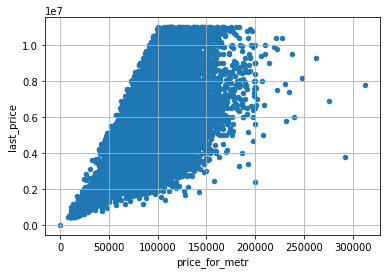

In [37]:
table.plot(x='price_for_metr', y='last_price', kind='scatter', grid=True) #изучена зависимость стоимости квартиры от стоимости заквадратный метр

Построена диаграмма рассения - изучена зависимость стоиомости картиры от квадратного метра, получены логичные результаты - с ростом цены за квадратны метр наблюдается прямая зависилмть роста за всю площадь квартиры. Вывод ниже подтвержден расчетом коэффициента корреляции Пирсона - он положительный, то есть с ростом первой величины растёт вторая.

In [38]:
print(table['price_for_metr'].corr(table['last_price']))

0.6274550382019539


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

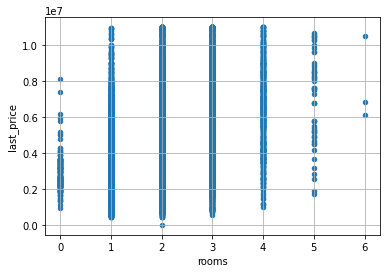

In [39]:
table.plot(x='rooms', y='last_price', kind='scatter', grid=True)  #изучена зависимость стоимости квартиры от количества комнат

In [40]:
print(table['rooms'].corr(table['last_price']))

0.42574795291450257


Аналогично построена диаграмма рассения - изучена зависимость стоиомости картиры от количества комнат. Также наблюдается линейная зависимость, чем больше комнат, тем выше цена. Также расчитан коэффициент корреляции Пирсона - он снова положительный, линейная зависимость подтверждена.

<AxesSubplot:xlabel='last_price', ylabel='citycenters_nearest'>

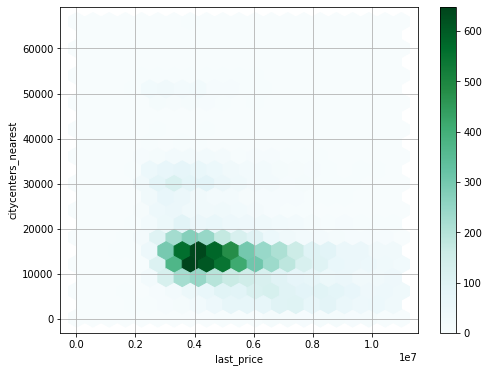

In [41]:
table.plot(x='last_price', y='citycenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) #изучена зависимость стоимости квартиры от расстояния до центра

<AxesSubplot:xlabel='last_price', ylabel='citycenters_nearest'>

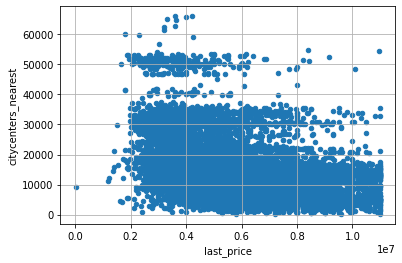

In [42]:
table.plot(x='last_price', y='citycenters_nearest', kind='scatter', grid=True)

In [43]:
print(table['citycenters_nearest'].corr(table['last_price']))

-0.3402668726289891


Из графиков видно, что зависимость между расстоянием до центра и стоимостью квартир есть, вывод подтвержден расчетом коэффициента корреляции Пирсона, знаечние отрицательное, это означает, что рост одной величины связан с уменьшением другой. То есть чем дальше квартира от центра, тем выше цена.

<AxesSubplot:xlabel='floor_def'>

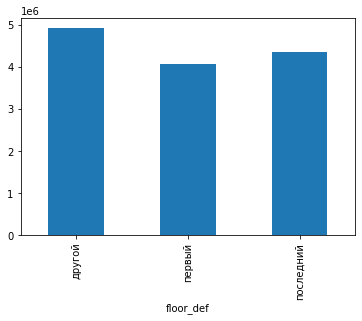

In [44]:
table.groupby('floor_def')['last_price'].mean().plot.bar()

Из полученного графика также видно, что зависимости между ценой квартиры и этажом есть, самые дешевые квартиры находятся на первом этаже, квартиры на последних этажах стоят дороже, чем на первом, но всё-таки дешевле, чем на всех остальных. Соответсвенно самые дорогие квартиры, находящиеся выше первого, но ниже последнего этажей.

<AxesSubplot:xlabel='last_price', ylabel='weekday'>

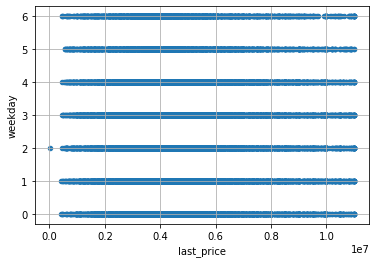

In [45]:
#изучена зависимость стоимости квартиры от даты размещения

table.plot(x='last_price', y='weekday', kind='scatter', grid=True)

In [46]:
print(table['weekday'].corr(table['last_price']))

-0.01027153068348217


<AxesSubplot:xlabel='last_price', ylabel='month'>

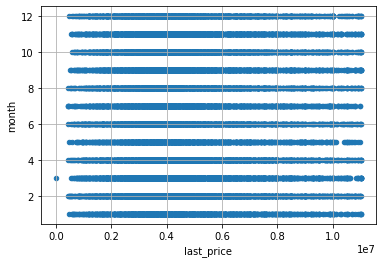

In [47]:
table.plot(x='last_price', y='month', kind='scatter', grid=True)

In [48]:
print(table['month'].corr(table['last_price']))

0.002282259043165671


<AxesSubplot:xlabel='last_price', ylabel='year'>

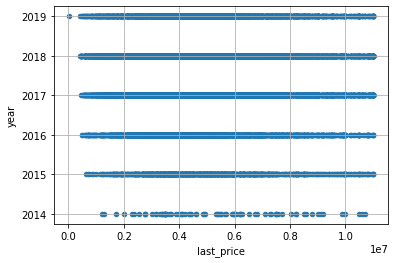

In [49]:
table.plot(x='last_price', y='year', kind='scatter', grid=True)

In [50]:
print(table['year'].corr(table['last_price']))

0.011983859527870969


Зависимости между ценой и датой размещения объявления нет - коэффициенты корреляции Пирсона либо отрицательные, либо близки к 0. Но для дополнительной проверки данных построим Матрицу диаграмм рассеяния

In [51]:
common_date = table.pivot_table(index = 'last_price', values=['weekday', 'month', 'year'], aggfunc='mean')
common_date.corr()

,month,weekday,year
month,1.000000,0.063012,-0.235761
weekday,0.063012,1.000000,-0.025125
year,-0.235761,-0.025125,1.000000


array([[<AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='weekday', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>],
       [<AxesSubplot:xlabel='month', ylabel='weekday'>,
        <AxesSubplot:xlabel='weekday', ylabel='weekday'>,
        <AxesSubplot:xlabel='year', ylabel='weekday'>],
       [<AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='weekday', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

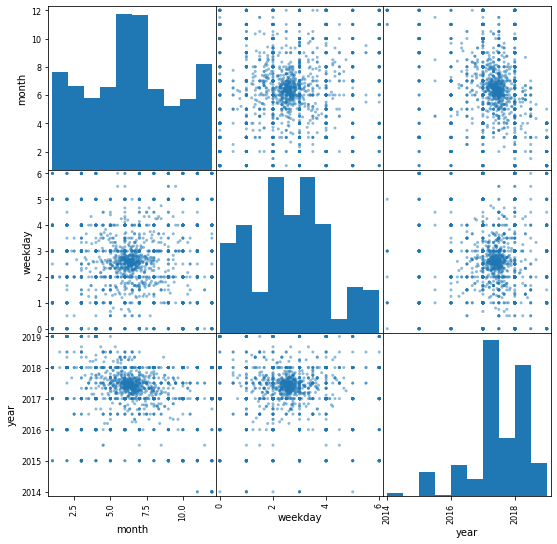

In [52]:
pd.plotting.scatter_matrix(common_date, figsize=(9, 9))

Из полученных данных видно:
- самая высокая цена на квартиры была в июне
- яркой зависимости и роста цена с каждым годом не видно, но можно обратить внимание, что самые высокие цены были в 2017 году
- по дням недели - самые высокие цены были по четвергам, на выходных наблюдается снижение цен

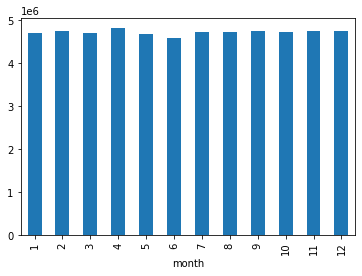

In [53]:
# код ревьюера

table.groupby('month')['last_price'].mean().plot.bar();

In [54]:
group_local = table['locality_name'].value_counts() # выделены 10 населённых пунктов с наибольшим числом объявлений
print(group_local.head(10))

Санкт-Петербург      13302
посёлок Мурино         518
посёлок Шушары         434
Всеволожск             394
Колпино                335
Пушкин                 335
посёлок Парголово      326
Гатчина                302
деревня Кудрово        298
Выборг                 227
Name: locality_name, dtype: int64


In [55]:
location_new_spb = table.query('locality_name == "Санкт-Петербург"')
spb_price = location_new_spb['price_for_metr'].mean().astype(int)

location_new_murino = table.query('locality_name == "посёлок Мурино"')
murino_price = location_new_murino['price_for_metr'].mean().astype(int)

location_new_sushary = table.query('locality_name == "посёлок Шушары"')
sushary_price = location_new_sushary['price_for_metr'].mean().astype(int)

location_new_vsev = table.query('locality_name == "Всеволожск"')
vsev_price = location_new_vsev['price_for_metr'].mean().astype(int)

location_new_kolp = table.query('locality_name == "Колпино"')
kolp_price = location_new_kolp['price_for_metr'].mean().astype(int)

location_new_pyshk = table.query('locality_name == "Пушкин"')
pyshk_price = location_new_pyshk['price_for_metr'].mean().astype(int)

location_new_pargol = table.query('locality_name == "посёлок Парголово"')
pargol_price = location_new_pargol['price_for_metr'].mean().astype(int)

location_new_gatch = table.query('locality_name == "Гатчина"')
gatch_price = location_new_gatch['price_for_metr'].mean().astype(int)

location_new_kudrovo = table.query('locality_name == "деревня Кудрово"')
kudrovo_price = location_new_kudrovo['price_for_metr'].mean().astype(int)

location_new_vyborg = table.query('locality_name == "Выборг"')
vyborg_price = location_new_vyborg['price_for_metr'].mean().astype(int)


print('Средняя цена за метр в Санкт-Петербурге', spb_price)
print('Средняя цена за метр в посёлке Мурино', murino_price)
print('Средняя цена за метр в посёлке Шушары', sushary_price)
print('Средняя цена за метр во Всеволжске', vsev_price)
print('Средняя цена за метр в Колпино', kolp_price)
print('Средняя цена за метр в Пушкине', pyshk_price)
print('Средняя цена за метр в поселке Парголово', pargol_price)
print('Средняя цена за метр в Гатчине', gatch_price)
print('Средняя цена за метр в деревне Кудрово', kudrovo_price)
print('Средняя цена за метр в Выборге', vyborg_price)

Средняя цена за метр в Санкт-Петербурге 105322
Средняя цена за метр в посёлке Мурино 85645
Средняя цена за метр в посёлке Шушары 78585
Средняя цена за метр во Всеволжске 67221
Средняя цена за метр в Колпино 75221
Средняя цена за метр в Пушкине 100309
Средняя цена за метр в поселке Парголово 90331
Средняя цена за метр в Гатчине 68674
Средняя цена за метр в деревне Кудрово 92409
Средняя цена за метр в Выборге 58192


In [56]:
location_pivot = table.pivot_table(index='locality_name', values='price_for_metr').sort_values('price_for_metr', ascending=False)
display(location_pivot.head(10))

,price_for_metr
locality_name,
посёлок Лисий Нос,121615.500000
Санкт-Петербург,105322.534581
Зеленогорск,102890.190476
Сестрорецк,100696.024845
Пушкин,100309.764179
Кудрово,99779.594118
деревня Мистолово,98549.545455
посёлок Левашово,96997.000000
Мурино,92722.264706


In [57]:
# код ревьюера

top_data = table['locality_name'].value_counts().sort_values(ascending=False).head(10)
table.query('locality_name in @top_data.index').pivot_table(index='locality_name', values='price_for_metr', aggfunc='mean')

,price_for_metr
locality_name,
Всеволожск,67221.964467
Выборг,58192.268722
Гатчина,68674.996689
Колпино,75221.444776
Пушкин,100309.764179
Санкт-Петербург,105322.534581
деревня Кудрово,92409.265101
посёлок Мурино,85645.445946
посёлок Парголово,90331.840491


In [58]:
display(location_pivot.tail(10))# выведена инфомрация о 10-ти населенных пунктах с наименьшей ценой за квадратный метр

,price_for_metr
locality_name,
деревня Ям-Тесово,13711.0
деревня Сижно,13709.0
деревня Бор,13157.0
поселок Тёсово-4,12931.0
деревня Малая Романовка,12724.0
поселок Совхозный,12628.5
деревня Выскатка,12335.0
деревня Вахнова Кара,11688.0
посёлок станции Свирь,11481.0


Из полученных данны видно, что самая дорогостоящая недвижимость находится в посёлке Лисий Нос, самые дешевые квартиры можно приобрести в деревне Старополье	

In [59]:
table['citycenters_nearest_km'] = (table['citycenters_nearest']/1000).round() # добавлен столбец - расстояние до центра в километрах

array([[<AxesSubplot:title={'center':'citycenters_nearest_km'}>]],
      dtype=object)

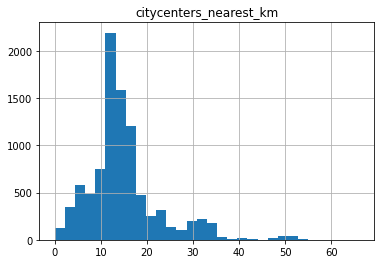

In [60]:
table.pivot_table(index='price_for_metr', values='citycenters_nearest_km').hist(bins=30) # построен график сводной талицы - зависимость цены за квадратный метр от удаленности от центра


Из графика видно, что самы высокий пик в нуле - логичные данные, так как это и есть сам центр, цены за квадратный метр в этом райне будут самыми высокими. Спад на цену за квадратный метр наблюдается от значения 17 км от центра, то есть это расстояние будет считаться центральным районом.

<AxesSubplot:xlabel='citycenters_nearest_km'>

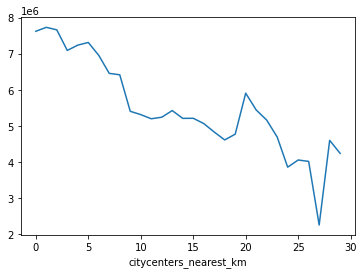

In [61]:
table[table['locality_name'] == 'Санкт-Петербург'].groupby('citycenters_nearest_km')['last_price'].mean().plot()

Также построен линейный грфаик зависиомсти цены квартиры от удаленности от центра. Выше был сделан вывод о том, что чем дальше квартира от центра, тем ниже её цена. Резкий спад цены наблюдается в точке 4 км (но от неё до расстояния в 5 км еще наблюдается рост), после значения в 5 км цены на квартиры намного ниже. Поэтому предположительно граница центра Санкт-петербурга проходит в 4-5 км от самого центра.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

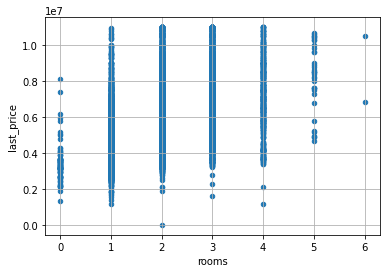

In [62]:
table_citycenters = table.query('citycenters_nearest_km <= 17') # местодом query взят диапозон квартир, находящихся в центральном районе
table_citycenters.plot(x='rooms', y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='floor', ylabel='last_price'>

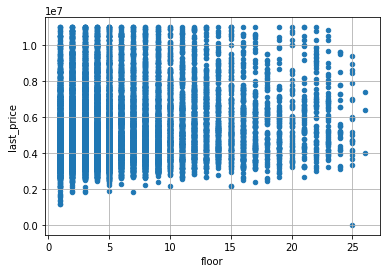

In [63]:
table_citycenters.plot(x='floor', y='last_price', kind='scatter', grid=True)

In [64]:
common_date_a = table_citycenters.pivot_table(index = 'last_price', values=['weekday', 'month', 'year'], aggfunc='mean')
common_date.corr()

,month,weekday,year
month,1.000000,0.063012,-0.235761
weekday,0.063012,1.000000,-0.025125
year,-0.235761,-0.025125,1.000000


array([[<AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='weekday', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>],
       [<AxesSubplot:xlabel='month', ylabel='weekday'>,
        <AxesSubplot:xlabel='weekday', ylabel='weekday'>,
        <AxesSubplot:xlabel='year', ylabel='weekday'>],
       [<AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='weekday', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

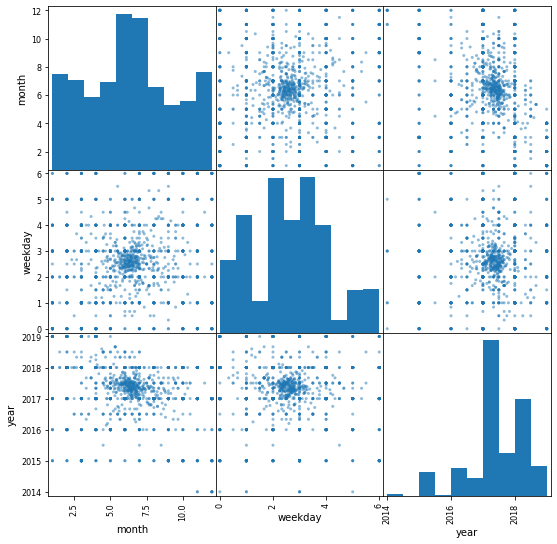

In [65]:
pd.plotting.scatter_matrix(common_date_a, figsize=(9, 9))

<AxesSubplot:xlabel='last_price', ylabel='citycenters_nearest'>

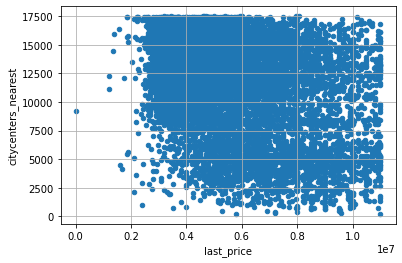

In [66]:
table_citycenters.plot(x='last_price', y='citycenters_nearest', kind='scatter', grid=True)

In [67]:
print(table['citycenters_nearest'].corr(table['last_price']))

-0.3402668726289891


Из анализа данных сегмента квартир, находящихся в центре видно, что завимлсти аналогичны общей таблицы. На цену за квартиру влияет удаленность от центра, зависиомсть от даты размещения аналогична всей таблице. Также наблюдается линейная зависимость, чем больше комнат, тем выше цена.

<AxesSubplot:>

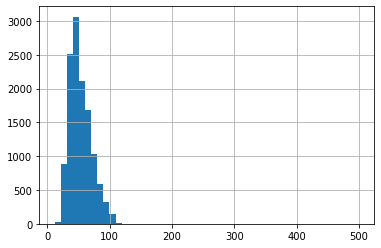

In [68]:
table_citycenters['total_area'].hist(bins=50, range = (12, 500)) # построена гистограмма площади квартир в центральном районе

Построена гистрограама плоащи квартир в центральном райне, данные не отличаются от ранее полученных для общей таблице, также виден ярко вырыженыный пик в области квартир с площадью от 30-60 кв.м.

<AxesSubplot:>

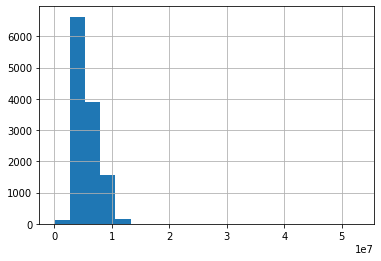

In [69]:
table_citycenters['last_price'].hist(bins=20, range = (12000, 53000000)) #  построена гистограмма цены за картиру в центральном районе

Гистограмма цен за квартиру так же мало отличется от иформации, которую получили для общей таблице. Наибольший пик наблюдается при цене за квартиру 5 млн.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

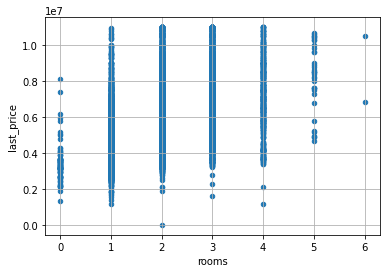

In [70]:
table_citycenters.plot(x='rooms', y='last_price', kind='scatter', grid=True) # построена гистограмма количества комнат в центральном районе

Снова не выявлено ярких особенностей, в основм в квартирах от 1-ой до 4-х комнат.

<AxesSubplot:>

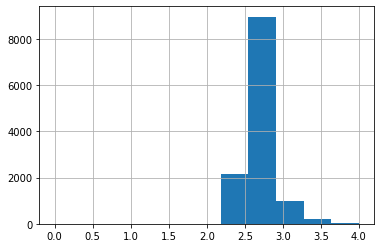

In [71]:
table_citycenters['ceiling_height'].hist(bins=11, range = (0, 4))

Из гистрограммы видно, что в квартирах чаще всего высота потолков 1.9-2.1 метров, как и в данных из общей таблицы. Также наблюдается небольшой пик - встречаются квартиры с высотой потолков 3 метра.

## Общий вывод

В результате работы были проанализированы данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Проведена предобработка данных, обработаны пропущенные и выбивающиеся значения. Значения в столбцах ceiling_height, kitchen_area, living_are заменены медианными значениями (предположительно - высота потолков, площадь кухни и площадь квартиры - чаще всего это стандартные значения при строительстве домов). Значения в столбцах parks_around3000, balcony, ponds_around3000 заменены на 0 (предположили, что если эти значения не заполнены, то в квартире нет балконов, а рядом с домом нет парков и прудов). В столбцах parks_nearest, airports_nearest, ponds_nearest и cityCenters_nearest данные невозможно заменить, удалить также нет возможности, так как тогда мы потеярем большой объем даннных, поэтому пропуски оставлены без изменений. Пропуски удалены лишь в столбце floors_total, так как эти данные не повлияют на дальнейший расчет, процент удаленных данных составил 0.4% от общего массива данных.

Проанализирвоан как общий массив данных, так и выделен сегмент квартир, находящихся в центральном районе. Выявлена прямая зависимость роста цены за кввартиру при росте цены за квадраный метр. Количество компант в квартирах чаще всего от 1-3, встречаются квартиры-студии, высота потолков чаще всего составляет от 2.5 до 3-х метров метров. Также наблюдается линейная зависимость, чем больше комнат, тем выше цена. Ярко выражена зависимость между расстоянием до центра и стоимостью квартир, цена дальше квартира от центра, тем ниже цена на неё. Выявлено, что самая дорогая недвижимость в находится в посёлке Лисий Нос (расчитана средняя цена за квадратный местр), самые дешевые квартиры можно приобрести в деревне Старополье.